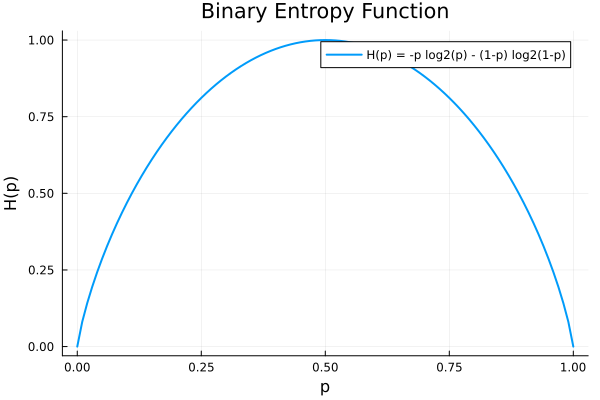

In [1]:
using Plots

# Define the entropy function
function entropy(p)
    if p == 0 || p == 1
        return 0.0 # Entropy is zero at extremes
    else
        return -p * log2(p) - (1 - p) * log2(1 - p)
    end
end

# Generate probabilities and compute entropy
p_values = 0:0.01:1 # Probability values from 0 to 1
H_values = [entropy(p) for p in p_values] # Compute entropy for each p

# Plot entropy as a function of p
plot(p_values, H_values, xlabel="p", ylabel="H(p)", title="Binary Entropy Function",
     label="H(p) = -p log2(p) - (1-p) log2(1-p)", linewidth=2)

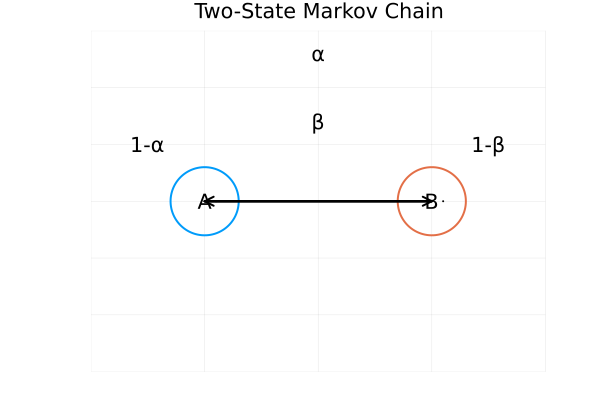

In [5]:
using Plots

function draw_markov_chain()
    # Define positions of the states
    A = (0.0, 1.0)  # State A coordinates
    B = (2.0, 1.0)  # State B coordinates

    # Plot the states as circles
    plot(circle_shape(A, 0.3), aspect_ratio=:equal, lw=2, legend=false, 
         title="Two-State Markov Chain", xlims=(-1, 3), ylims=(-0.5, 2.5), axis=false)
    plot!(circle_shape(B, 0.3), lw=2, axis=false)

    # Label the states
    annotate!(A[1], A[2], "A")
    annotate!(B[1], B[2], "B")

    # Draw arrows for transitions
    arrow!(A, A, lw=2, arrow=:arrow, color=:black, offset=(0.1, 0))
    annotate!(A[1] - 0.5, A[2] + 0.5, "1-α")

    arrow!(A, B, lw=2, arrow=:arrow, color=:black)
    annotate!((A[1] + B[1]) / 2, (A[2] + B[2]) + 0.3, "α")

    arrow!(B, B, lw=2, arrow=:arrow, color=:black, offset=(0.1, 0))
    annotate!(B[1] + 0.5, B[2] + 0.5, "1-β")

    arrow!(B, A, lw=2, arrow=:arrow, color=:black)
    annotate!((B[1] + A[1]) / 2, (B[2] + A[2]) - 0.3, "β")

    return current()
end

function circle_shape(center, radius)
    θ = range(0, 2π, length=100)
    x = center[1] .+ radius .* cos.(θ)
    y = center[2] .+ radius .* sin.(θ)
    return x, y
end

function arrow!(start, stop; lw=1, color=:black, arrow=:arrow, offset=(0, 0))
    dx, dy = stop[1] - start[1], stop[2] - start[2]
    plot!([start[1] + offset[1], stop[1] + offset[1]],
          [start[2] + offset[2], stop[2] + offset[2]],
          arrow=arrow, color=color, lw=lw)
end

# Generate the plot
draw_markov_chain()

# References

The unit of **entropy** is the **bit** when the logarithm in the entropy formula is computed using base 2. Here's why:

### **Entropy and Information**
Entropy quantifies the uncertainty or information content in a random variable. When expressed in bits:
- **One bit** represents the amount of information required to distinguish between two equally likely outcomes (e.g., heads or tails in a fair coin flip).

### **Logarithm Base 2**
The entropy formula is:
$
H(X) = - \sum_{x \in X} P(x) \log_b P(x)
$
- The base $ b $ of the logarithm determines the unit of entropy.
  - If $ b = 2 $, the unit is **bits**.
  - If $ b = e $, the unit is **nats**.
  - If $ b = 10 $, the unit is **hartleys**.
  
Using base 2 means the entropy measures how many binary decisions (yes/no or 0/1) are required to encode or represent the information.

### **Bits as a Natural Choice**
1. **Binary Systems**: In digital systems, data is stored and processed in binary (0s and 1s), making bits a natural unit for measuring information.
2. **Interpretability**: A value of $ H(X) = 3 $ bits, for example, means 3 binary decisions (or a message length of 3 bits) are needed, on average, to describe the random variable $ X $.

### **Practical Examples**
- A fair coin flip has entropy:
  $
  H(X) = -\sum_{x} P(x) \log_2 P(x) = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1 \text{ bit}.
  $
  This reflects the need for **1 bit** to encode the result (heads or tails).
  
Thus, the unit **bit** naturally emerges when dealing with binary systems and information theory applications.

Whether higher entropy (greater uncertainty) is **better or worse** depends on the **context**:

---

### **When Higher Entropy is Better:**
1. **Cryptography**:
   - Higher entropy in cryptographic keys or random number generators means greater randomness and security.
   - Example: A cryptographic key with higher entropy is harder to guess or brute-force.

2. **Diversity and Fairness**:
   - In resource distribution or decision-making, higher entropy may indicate greater diversity or fairness.
   - Example: A perfectly fair dice roll has maximum entropy.

3. **Unbiased Information**:
   - High entropy often indicates unbiased and unpredictable outcomes, desirable in simulations or randomized experiments.

---

### **When Lower Entropy is Better:**
1. **Compression**:
   - Lower entropy means less uncertainty, enabling more efficient data compression.
   - Example: Repeated or predictable patterns (low entropy) are easier to compress.

2. **Signal Clarity**:
   - In communication systems, low entropy in the signal helps reduce noise and improve reliability.
   - Example: A predictable signal is easier to decode.

3. **Control and Predictability**:
   - In deterministic systems, low entropy signifies more control or predictability.
   - Example: In production systems, less variability (low entropy) means consistent quality.

---

### **Summary**:
- **Higher entropy**: Desirable for randomness, fairness, and security.
- **Lower entropy**: Desirable for predictability, efficiency, and control.

It depends on whether the situation benefits from uncertainty (e.g., randomness in security) or order (e.g., precision in communication).

The difference between $ H(.) $ and $ I(.) $ lies in what they measure in information theory:

---

### **1. Entropy ($ H(.) $)**
- **Definition**: $ H(X) $ quantifies the uncertainty or the average amount of information in a random variable $ X $.
- **Formula**:
  $
  H(X) = -\sum_{x \in X} P(x) \log P(x)
  $
- **Meaning**:
  - Measures **uncertainty**: Higher entropy means more unpredictability.
  - If $ X $ has equally likely outcomes, $ H(X) $ is maximized.
  - Unit: Bits (if logarithm base 2).

---

### **2. Mutual Information ($ I(.) $)**
- **Definition**: $ I(X; Y) $ quantifies the amount of information that one random variable $ X $ provides about another variable $ Y $. It measures the reduction in uncertainty about $ Y $ given knowledge of $ X $.
- **Formula**:
  $
  I(X; Y) = H(X) + H(Y) - H(X, Y)
  $
  or equivalently:
  $
  I(X; Y) = H(Y) - H(Y|X)
  $
- **Meaning**:
  - Measures **shared information** between $ X $ and $ Y $.
  - $ I(X; Y) = 0 $ if $ X $ and $ Y $ are independent (no shared information).
  - $ I(X; Y) = H(X) = H(Y) $ if $ X $ completely determines $ Y $ (and vice versa).

---

### **Key Differences**
| Aspect              | $ H(.) $: Entropy                      | $ I(.) $: Mutual Information           |
|---------------------|------------------------------------------|------------------------------------------|
| **Measures**        | Uncertainty in a single random variable  | Shared information between two variables |
| **Purpose**         | Quantifies unpredictability              | Quantifies dependency                    |
| **Range**           | $ H(X) \geq 0 $                       | $ I(X; Y) \geq 0 $                    |
| **Context**         | Used to evaluate randomness              | Used to measure relationships            |

---

### **Example**
- $ H(X) $: Measures the uncertainty in the outcome of rolling a die (e.g., $ \log_2(6) $ for a fair die).
- $ I(X; Y) $: Measures how much information knowing $ X $ (e.g., a biased die roll) reduces uncertainty about $ Y $ (e.g., the sum of two rolls).

In **Information Theory**, the expression $ E[\mathcal{L}(\xi(X^n))] $ often represents the **expected distortion** or **expected cost** when encoding or processing a sequence $ X^n $:

$
E[\mathcal{L}(\xi(X^n))] = \text{Expected distortion or loss when using } \xi \text{ as the encoder/estimator}.
$

- **$ \xi(X^n) $**: The encoding or decision rule based on $ X^n $.
- **$ \mathcal{L} $**: A distortion or loss function, such as squared error or log loss.
- **Application**: Captures the trade-off between compression (e.g., rate) and fidelity (e.g., distortion).